In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# qcdenoise imports
from qcdenoise import DenseModel
from qcdenoise.io_utils import QCIRCDataSetNumpy
from qcdenoise.ml_utils import train, test

### 1. GHZ

#### Load Data

In [34]:
GHZ_traindata = QCIRCDataSetNumpy('GHZ_test_train.npy')
GHZ_testdata = QCIRCDataSetNumpy('GHZ_test_test.npy')
print('Total # of samples in train set: {}, test set:{}'.format(len(GHZ_traindata), len(GHZ_testdata)))
GHZ_trainloader = DataLoader(GHZ_traindata, batch_size=32, shuffle=True, pin_memory=True)
GHZ_testloader = DataLoader(GHZ_testdata, batch_size=32, shuffle=True, pin_memory=True)

Total # of samples in train set: 32000, test set:8000


#### initiate model

In [35]:
inputs, targets = GHZ_testdata[0]['input'], GHZ_testdata[0]['target']
inputs_dim = inputs.shape[0]
targets_dim = targets.shape[0]
ghz_net = DenseModel(inputs_dim=inputs_dim, targets_dim=targets_dim)
print(ghz_net)

DenseModel(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (softmax): Softmax(dim=1)
)


### Train

In [36]:
mse = torch.nn.MSELoss(reduction='sum')
ghz_net = train(ghz_net, GHZ_trainloader, mse, lr=5e-4, num_epochs=10)

Epoch=1, Batch=  500, Loss= 3.005
Epoch=1, Batch= 1000, Loss= 0.022
Epoch=2, Batch=  500, Loss= 0.013
Epoch=2, Batch= 1000, Loss= 0.008
Epoch=3, Batch=  500, Loss= 0.007
Epoch=3, Batch= 1000, Loss= 0.009
Epoch=4, Batch=  500, Loss= 0.013
Epoch=4, Batch= 1000, Loss= 0.004
Epoch=5, Batch=  500, Loss= 0.007
Epoch=5, Batch= 1000, Loss= 0.007
Epoch=6, Batch=  500, Loss= 0.007
Epoch=6, Batch= 1000, Loss= 0.005
Epoch=7, Batch=  500, Loss= 0.008
Epoch=7, Batch= 1000, Loss= 0.006
Epoch=8, Batch=  500, Loss= 0.006
Epoch=8, Batch= 1000, Loss= 0.007
Epoch=9, Batch=  500, Loss= 0.006
Epoch=9, Batch= 1000, Loss= 0.004
Epoch=10, Batch=  500, Loss= 0.007
Epoch=10, Batch= 1000, Loss= 0.005


### Test

In [37]:
_ = test(ghz_net, GHZ_testloader, mse)

Batches=250, Average Loss= 0.003


sample=3824


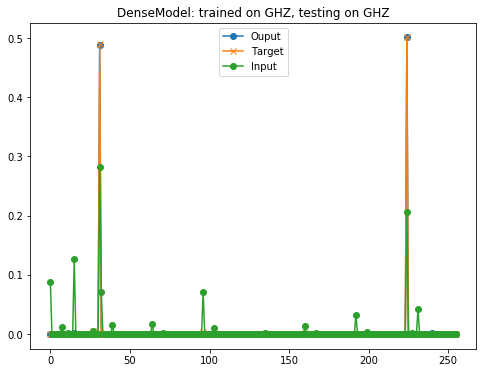

In [48]:
idx = np.random.randint(0, len(GHZ_testdata)-1)
print('sample=%d'%idx)
inputs, targets = GHZ_testdata[idx]['input'], GHZ_testdata[idx]['target']
with torch.no_grad():
    net = ghz_net.to('cpu')
    inputs = torch.unsqueeze(inputs,0)
    outputs = net(inputs)
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(np.squeeze(outputs.numpy()), label='Ouput', marker='o')
ax.plot(np.squeeze(targets.numpy()), label='Target', marker='x')
ax.plot(np.squeeze(inputs.numpy()), label='Input', marker='o')
ax.set_title('DenseModel: trained on GHZ, testing on GHZ')
ax.legend()

### 1. UCCSD

#### Load Data

In [49]:
UCCSD_traindata = QCIRCDataSetNumpy('UCCSD_test_train.npy')
UCCSD_testdata = QCIRCDataSetNumpy('UCCSD_test_test.npy')
print('Total # of samples in train set: {}, test set:{}'.format(len(UCCSD_traindata), len(UCCSD_testdata)))
UCCSD_trainloader = DataLoader(UCCSD_traindata, batch_size=32, shuffle=True, pin_memory=True)
UCCSD_testloader = DataLoader(UCCSD_testdata, batch_size=32, shuffle=True, pin_memory=True)

Total # of samples in train set: 32000, test set:8000


#### initiate model

In [50]:
inputs, targets = UCCSD_testdata[0]['input'], UCCSD_testdata[0]['target']
inputs_dim = inputs.shape[0]
targets_dim = targets.shape[0]
uccsd_net = DenseModel(inputs_dim=inputs_dim, targets_dim=targets_dim)
print(uccsd_net)

DenseModel(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (softmax): Softmax(dim=1)
)


### Train

In [51]:
mse = torch.nn.MSELoss(reduction='sum')
uccsd_net = train(uccsd_net, UCCSD_trainloader, mse, lr=5e-4, num_epochs=10)

Epoch=1, Batch=  500, Loss= 2.022
Epoch=1, Batch= 1000, Loss= 0.841
Epoch=2, Batch=  500, Loss= 0.371
Epoch=2, Batch= 1000, Loss= 0.294
Epoch=3, Batch=  500, Loss= 0.251
Epoch=3, Batch= 1000, Loss= 0.203
Epoch=4, Batch=  500, Loss= 0.194
Epoch=4, Batch= 1000, Loss= 0.168
Epoch=5, Batch=  500, Loss= 0.157
Epoch=5, Batch= 1000, Loss= 0.147
Epoch=6, Batch=  500, Loss= 0.137
Epoch=6, Batch= 1000, Loss= 0.124
Epoch=7, Batch=  500, Loss= 0.120
Epoch=7, Batch= 1000, Loss= 0.111
Epoch=8, Batch=  500, Loss= 0.110
Epoch=8, Batch= 1000, Loss= 0.099
Epoch=9, Batch=  500, Loss= 0.091
Epoch=9, Batch= 1000, Loss= 0.089
Epoch=10, Batch=  500, Loss= 0.083
Epoch=10, Batch= 1000, Loss= 0.081


### Test

In [52]:
_ = test(uccsd_net, UCCSD_testloader, mse)

Batches=250, Average Loss= 0.100


sample=3915


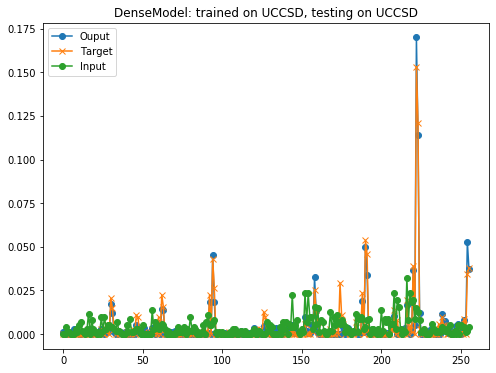

In [64]:
idx = np.random.randint(0, len(UCCSD_testdata)-1)
print('sample=%d'%idx)
inputs, targets = UCCSD_testdata[idx]['input'], UCCSD_testdata[idx]['target']
with torch.no_grad():
    net = uccsd_net.to('cpu')
    inputs = torch.unsqueeze(inputs,0)
    outputs = net(inputs)
fig,ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(np.squeeze(outputs.numpy()), label='Ouput', marker='o')
ax.plot(np.squeeze(targets.numpy()), label='Target', marker='x')
ax.plot(np.squeeze(inputs.numpy()), label='Input', marker='o')
ax.set_title('DenseModel: trained on UCCSD, testing on UCCSD')
ax.legend()

## Swapping Models

#### Using trained GHZ model on UCCSD data

In [65]:
_ = test(ghz_net, UCCSD_testloader, mse)
_ = test(uccsd_net, GHZ_testloader, mse)

Batches=250, Average Loss= 3.614
Batches=250, Average Loss= 17.115


sample=2384


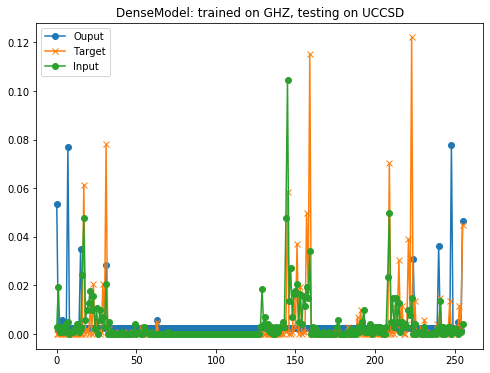

In [66]:
idx = np.random.randint(0, len(UCCSD_testdata)-1)
print('sample=%d'%idx)
inputs, targets = UCCSD_testdata[idx]['input'], UCCSD_testdata[idx]['target']
with torch.no_grad():
    net = ghz_net.to('cpu')
    inputs = torch.unsqueeze(inputs,0)
    outputs = net(inputs)
fig,ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(np.squeeze(outputs.numpy()), label='Ouput', marker='o')
ax.plot(np.squeeze(targets.numpy()), label='Target', marker='x')
ax.plot(np.squeeze(inputs.numpy()), label='Input', marker='o')
ax.set_title('DenseModel: trained on GHZ, testing on UCCSD')
ax.legend()

sample=2956


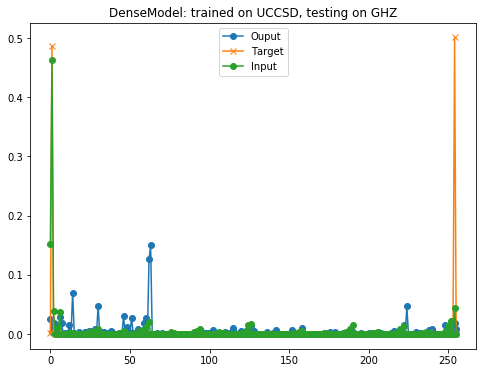

In [70]:
idx = np.random.randint(0, len(UCCSD_testdata)-1)
print('sample=%d'%idx)
inputs, targets = GHZ_testdata[idx]['input'], GHZ_testdata[idx]['target']
with torch.no_grad():
    net = uccsd_net.to('cpu')
    inputs = torch.unsqueeze(inputs,0)
    outputs = net(inputs)
fig,ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(np.squeeze(outputs.numpy()), label='Ouput', marker='o')
ax.plot(np.squeeze(targets.numpy()), label='Target', marker='x')
ax.plot(np.squeeze(inputs.numpy()), label='Input', marker='o')
ax.set_title('DenseModel: trained on UCCSD, testing on GHZ')
ax.legend()